Want to analyze density of order statistics in N(0,1). Then test whether sample rth order statistic is in fact rth order statistic from assumed distribution. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import comb

Below we define density function for rth order statistic of N(0,1).

In [3]:
def distr_order_statistic_normal(x, r, n):
    return n * comb(n-1, r-1) * norm.cdf(x)**(r-1) * (1 - norm.cdf(x))**(n-r) * norm.pdf(x)

Plot density of 50th order statistic from a sample of size 100 in N(0,1).

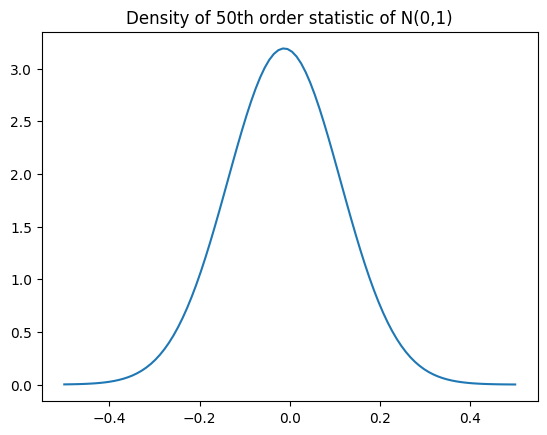

In [21]:
densities = []
domain = np.linspace(-0.5, 0.5, 100)
for x in domain:
    densities.append(distr_order_statistic_normal(x, 50, 100))

plt.figure()
plt.plot(domain, densities)
plt.title("Density of 50th order statistic of N(0,1)")
plt.show()

In the remaining we simulate a random sample from N(0,1) and plot where sample 96th order statistic falls on the theoretical density.

95th order statistic is:  2.1221561970126332


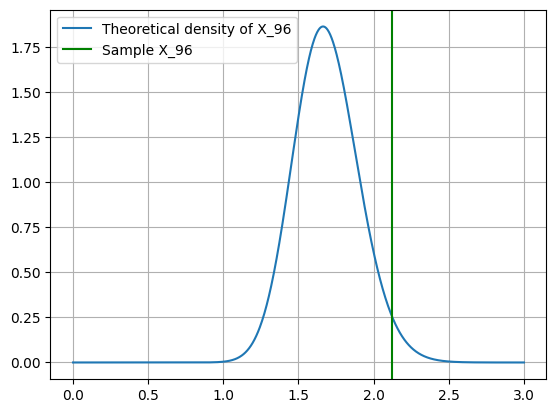

In [20]:
samp_size = 100
X = norm.rvs(size=samp_size)
X_sorted = np.sort(X)
X_96 = X_sorted[95] # 96th order statistic
print("95th order statistic is: ", X_96)

density_X_96 = []
domain = np.linspace(0, 3, 1000)
for x in domain:
    density_X_96.append(distr_order_statistic_normal(x, 96, samp_size))

plt.figure()
plt.plot(domain, density_X_96, label='Theoretical density of X_96')
plt.axvline(X_96, color='green', label='Sample X_96')
plt.legend()
plt.grid()
plt.show()


In practical applications we often want to test a certain hypothesis. Here we test whether our sample 96th order statistic is likely to be in fact also a theoretical 96th order statistic with confidence level 1-p = 0.95.

Cannot reject hypothesis that sample X_96 is 96th order statistic from a normal distribution at level p=0.05


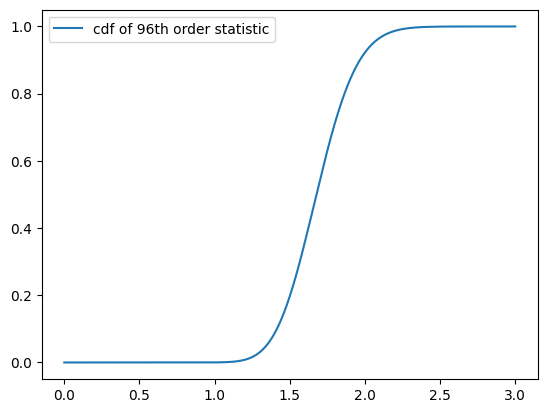

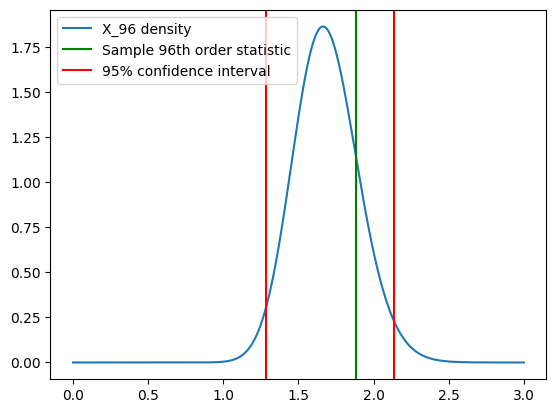

In [10]:
p = 0.05
density_X_96 = np.array(density_X_96)
dx = domain[1]-domain[0]
cdf = np.cumsum(density_X_96)*dx
plt.figure()
plt.plot(domain, cdf, label = 'cdf of 96th order statistic')
plt.legend()
lower_bound = np.where(cdf <0.025)[0].max()
upper_bound = np.where(cdf >= 0.975)[0].min()

# Plot 95 conf bounds:
plt.figure()
plt.plot(domain, density_X_96, label='X_96 density')
plt.axvline(X_96, color='green', label='Sample 96th order statistic')
plt.axvline(domain[lower_bound], color='red', label='95% confidence interval')
plt.axvline(domain[upper_bound], color='red')
plt.legend()
if domain[lower_bound] < X_96 < domain[upper_bound]:
    print("Cannot reject hypothesis that sample X_96 is 96th order statistic from a normal distribution at level p=0.05")


Observe however that this testing procedure can be non-trivial. The problem is that the densities of close order statistics have large overlaps.
As a result we might not be able to reject the hypothesis that sample X_96 is theoretical 97th order statistic as illustrated below.

Cannot reject hypothesis that sample X_96 is 97th order statistic from a normal distribution at level p=0.05.


<Figure size 640x480 with 0 Axes>

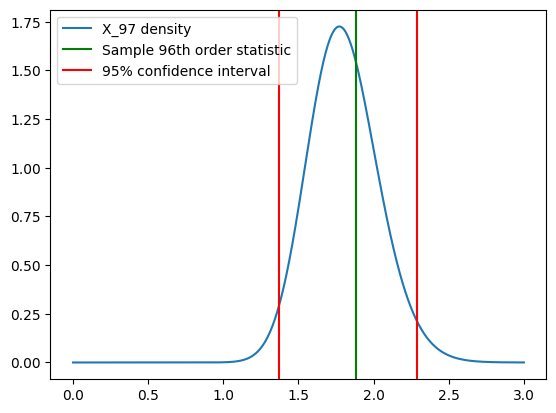

In [14]:
p = 0.05
density_X_97 = []
domain = np.linspace(0, 3, 1000)
for x in domain:
    density_X_97.append(distr_order_statistic_normal(x, 97, samp_size))

density_X_97 = np.array(density_X_97)
dx = domain[1]-domain[0]
cdf = np.cumsum(density_X_97)*dx
plt.figure()
#plt.plot(domain, cdf, label = 'cdf of 97th order statistic')
#plt.legend()
lower_bound = np.where(cdf <0.025)[0].max()
upper_bound = np.where(cdf >= 0.975)[0].min()

# Plot 95% conf bounds:
plt.figure()
plt.plot(domain, density_X_97, label='X_97 density')
plt.axvline(X_96, color='green', label='Sample 96th order statistic')
plt.axvline(domain[lower_bound], color='red', label='95% confidence interval')
plt.axvline(domain[upper_bound], color='red')
plt.legend()
if domain[lower_bound] < X_96 < domain[upper_bound]:
    print("Cannot reject hypothesis that sample X_96 is 97th order statistic from a normal distribution at level p=0.05.")
else:
    print("Reject hypothesis that sample X_96 is 97th order statistic from a normal distribution at level p=0.05.")
